In [21]:
import os

import matplotlib
import matplotlib.pyplot as plt
import scienceplots
plt.style.use("science")

import astropy.units as u

from astroquery.gaia import Gaia
from astroquery.simbad import Simbad

from astropy.visualization import quantity_support

variableName = os.getcwd().split('/')[-1]
variableName

'LINEAR_16694484'

In [3]:
# https://astroquery.readthedocs.io/en/latest/gaia/gaia.html#login-logout
if os.path.exists('../gaia-credentials.txt'):
    Gaia.login(credentials_file='../gaia-credentials.txt')

INFO: Login to gaia TAP server [astroquery.gaia.core]
INFO: OK [astroquery.utils.tap.core]
INFO: Login to gaia data server [astroquery.gaia.core]
INFO: OK [astroquery.utils.tap.core]


In [4]:
gaiaSourceId = None
simbadResult = Simbad.query_objectids(variableName)
allIds = simbadResult['ID']
for astroId in allIds:
    if 'Gaia DR3' in astroId:
        gaiaSourceId = int(astroId.replace('Gaia DR3 ', ''))

gaiaSourceId, type(gaiaSourceId)

(1384972475872713472, int)

In [5]:
os.makedirs("./data/gaia-datalink", exist_ok=True)
datalink = Gaia.load_data(ids=[int(gaiaSourceId)], data_release='Gaia DR3', data_structure='INDIVIDUAL', retrieval_type='ALL', format='votable', output_file="./data/gaia-datalink/", overwrite_output_file=True)

ERROR: Path /home/ramon/uanl/ensenada-work/PHOEBE-Ensenada-Models/LINEAR_16694484/data/gaia-datalink already exist [astroquery.gaia.core]


In [6]:
list(datalink.keys())

['MCMC_MSC-Gaia DR3 1384972475872713472.xml',
 'XP_SAMPLED-Gaia DR3 1384972475872713472.xml',
 'XP_CONTINUOUS-Gaia DR3 1384972475872713472.xml',
 'MCMC_GSPPHOT-Gaia DR3 1384972475872713472.xml',
 'EPOCH_PHOTOMETRY-Gaia DR3 1384972475872713472.xml',
 'sampled-spectrum.csv']

In [13]:
sed = datalink['XP_SAMPLED-Gaia DR3 1384972475872713472.xml'][0].to_table()
sed.to_pandas()

,wavelength,flux,flux_error
0,336.0,4.537816e-17,1.047471e-17
1,338.0,4.544656e-17,7.901557e-18
2,340.0,3.830325e-17,6.485295e-18
3,342.0,3.496032e-17,5.677440e-18
4,344.0,3.953803e-17,5.396717e-18
...,...,...,...
338,1012.0,1.453823e-17,5.434783e-18
339,1014.0,1.384905e-17,5.930432e-18
340,1016.0,1.364819e-17,6.267654e-18
341,1018.0,1.319110e-17,6.112013e-18


In [8]:
sed_pd = sed.to_pandas()
sed_pd['wavelength'] *= 10
sed_pd.to_csv("./data/gaia-datalink/sampled-spectrum.csv", index=False)

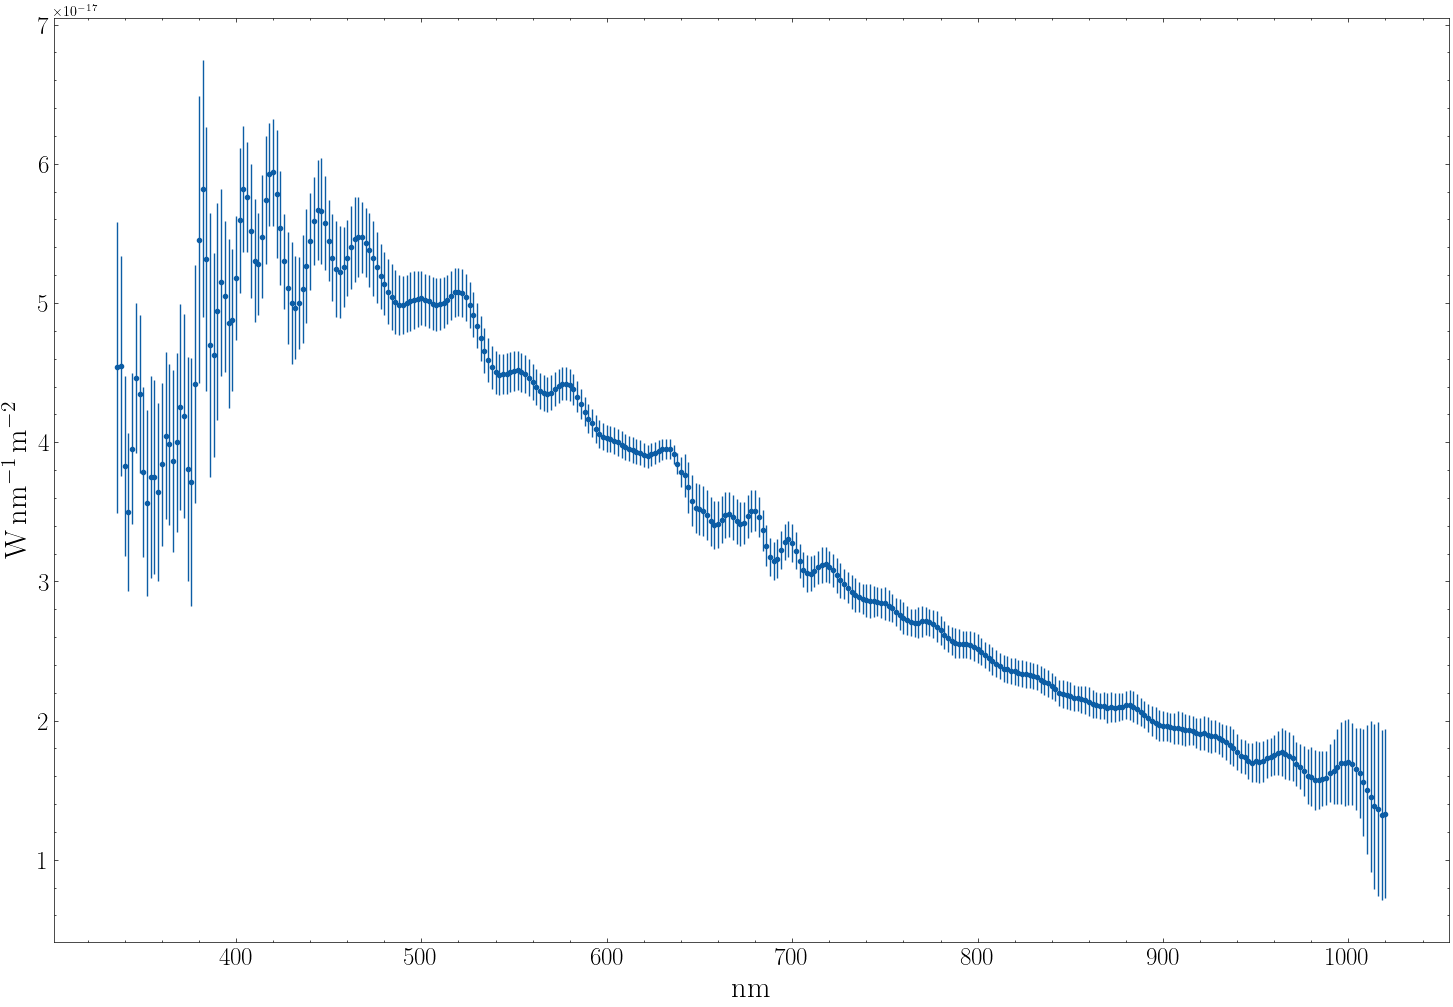

In [26]:
with quantity_support():
    fig, ax = plt.subplots(figsize=(18, 12))
    ax.errorbar(sed['wavelength']*u.nm/u.nm, sed['flux']*u.nm/u.nm, sed['flux_error']*u.nm/u.nm, ls='none', marker='.')
    ax.xaxis.label.set_size(22)
    ax.yaxis.label.set_size(22)
    ax.tick_params(axis='both', labelsize=18)